In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

In [73]:
dataset=pd.read_csv('Loan.csv')

In [74]:
print(dataset)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [75]:
print(dataset.head(5))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [76]:
print(dataset.iloc[3:6,2:5])

  Married Dependents     Education
3     Yes          0  Not Graduate
4      No          0      Graduate
5     Yes          2      Graduate


In [77]:
print(dataset.keys())

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [78]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [79]:
print(dataset.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [80]:
print(dataset.iloc[:,8:13].describe())

       LoanAmount  Loan_Amount_Term  Credit_History
count  592.000000         600.00000      564.000000
mean   146.412162         342.00000        0.842199
std     85.587325          65.12041        0.364878
min      9.000000          12.00000        0.000000
25%    100.000000         360.00000        1.000000
50%    128.000000         360.00000        1.000000
75%    168.000000         360.00000        1.000000
max    700.000000         480.00000        1.000000


In [81]:
print(dataset.duplicated().sum())

0


In [82]:
print(dataset.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool


In [83]:
print(dataset['Gender'].unique())
print(dataset['Married'].unique())
print(dataset['Dependents'].unique())
print(dataset['Education'].unique())
print(dataset['Self_Employed'].unique())
print(dataset['Loan_Amount_Term'].unique())
print(dataset['Credit_History'].unique())
print(dataset['Property_Area'].unique())
print(dataset['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
[ 1.  0. nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


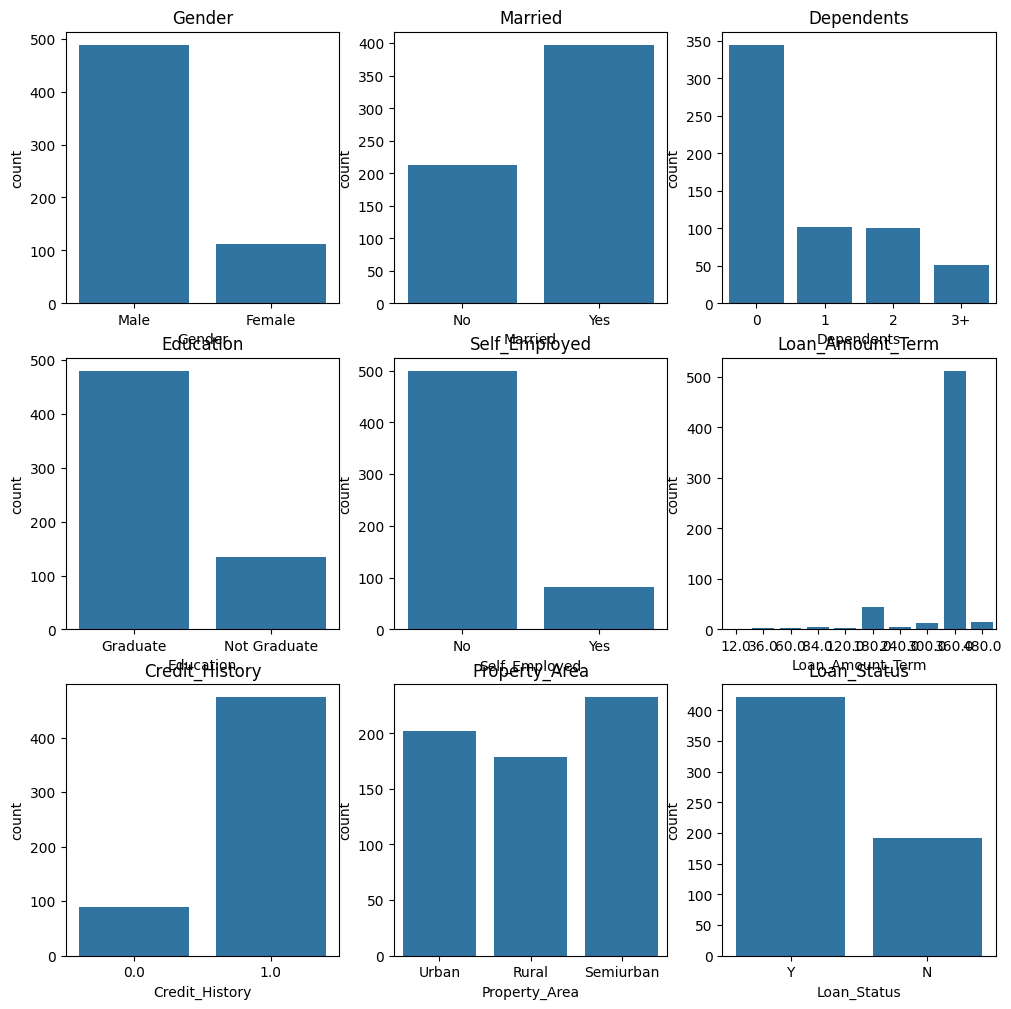

In [84]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))
sb.countplot(data=dataset, x='Gender',ax=axes[0,0]).set(title='Gender')
sb.countplot(data=dataset, x='Married',ax=axes[0,1]).set(title='Married')
sb.countplot(data=dataset, x='Dependents',ax=axes[0,2]).set(title='Dependents')
# #
sb.countplot(data=dataset, x='Education',ax=axes[1,0]).set(title='Education')
sb.countplot(data=dataset, x='Self_Employed',ax=axes[1,1]).set(title='Self_Employed')
sb.countplot(data=dataset, x='Loan_Amount_Term',ax=axes[1,2]).set(title='Loan_Amount_Term')
# #
sb.countplot(data=dataset, x='Credit_History',ax=axes[2,0]).set(title='Credit_History')
sb.countplot(data=dataset, x='Property_Area',ax=axes[2,1]).set(title='Property_Area')
sb.countplot(data=dataset, x='Loan_Status',ax=axes[2,2]).set(title='Loan_Status')
# #
plt.show()

In [85]:
dataset['Gender'].replace(np.nan,'Male', inplace=True)
dataset['Married'].replace(np.nan,'Yes', inplace=True)
dataset['Dependents'].replace(np.nan,'0', inplace=True)
dataset['Dependents']=dataset['Dependents'].str.replace('3+','3')
dataset['Self_Employed'].replace(np.nan,'No', inplace=True)
dataset['LoanAmount'].replace(np.nan,'146', inplace=True)
dataset['Loan_Amount_Term'].replace(np.nan,'342', inplace=True)
dataset['Credit_History'].replace(np.nan,'0', inplace=True)

C:\Users\my658\AppData\Local\Temp\ipykernel_11228\203580572.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].replace(np.nan,'Male', inplace=True)
C:\Users\my658\AppData\Local\Temp\ipykernel_11228\203580572.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [86]:
print(dataset.isnull().sum())
print(dataset.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(614, 13)


In [87]:
dataset.drop(['Loan_ID'], axis=1,inplace=True)
dataset.drop(['Loan_Status'], axis=1,inplace=True)
print(dataset.shape)

(614, 11)


In [88]:
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)
dataset['Married'] = label_encoder.fit_transform(dataset['Married'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)
dataset['Education'] = label_encoder.fit_transform(dataset['Education'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)
dataset['Self_Employed'] = label_encoder.fit_transform(dataset['Self_Employed'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)
dataset['Property_Area'] = label_encoder.fit_transform(dataset['Property_Area'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)
print(dataset['Gender'].unique())
print(dataset['Married'].unique())
print(dataset['Education'].unique())
print(dataset['Self_Employed'].unique())
print(dataset['Property_Area'].unique())

Label mapping: {'Female': 0, 'Male': 1}
Label mapping: {'No': 0, 'Yes': 1}
Label mapping: {'Graduate': 0, 'Not Graduate': 1}
Label mapping: {'No': 0, 'Yes': 1}
Label mapping: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
[1 0]
[0 1]
[0 1]
[0 1]
[2 0 1]


In [89]:
# dataset['Gender']=dataset['Gender'].map({'Male':1,'Female':2})
# dataset['Married']=dataset['Married'].map({'No':0,'Yes':1})
# dataset['Education']=dataset['Education'].map({'Not Graduate':0,'Graduate':1})
# dataset['Self_Employed']=dataset['Self_Employed'].map({'No':0,'Yes':1})
# dataset['Property_Area']=dataset['Property_Area'].map({'Urban':1,'Rural':1, 'Semiurban':0.5})

In [90]:
print(dataset.corr())

                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.364569    0.172914   0.045364      -0.000525   
Married            0.364569  1.000000    0.334216   0.012304       0.004489   
Dependents         0.172914  0.334216    1.000000   0.055752       0.056798   
Education          0.045364  0.012304    0.055752   1.000000      -0.010383   
Self_Employed     -0.000525  0.004489    0.056798  -0.010383       1.000000   
ApplicantIncome    0.058809  0.051708    0.118202  -0.140760       0.127180   
CoapplicantIncome  0.082912  0.075948    0.030430  -0.062290      -0.016100   
LoanAmount         0.107909  0.147131    0.163108  -0.167041       0.115259   
Loan_Amount_Term  -0.073567 -0.100863   -0.101054  -0.077242      -0.033943   
Credit_History     0.026655 -0.018150   -0.017523  -0.081637      -0.004994   
Property_Area     -0.025752  0.004257   -0.000244  -0.065243      -0.030860   

                   ApplicantIncome  CoapplicantInco

In [91]:
print(dataset['Gender'].unique())
print(dataset['Married'].unique())
print(dataset['Dependents'].unique())
print(dataset['Education'].unique())
print(dataset['Self_Employed'].unique())

[1 0]
[0 1]
['0' '1' '2' '3']
[0 1]
[0 1]


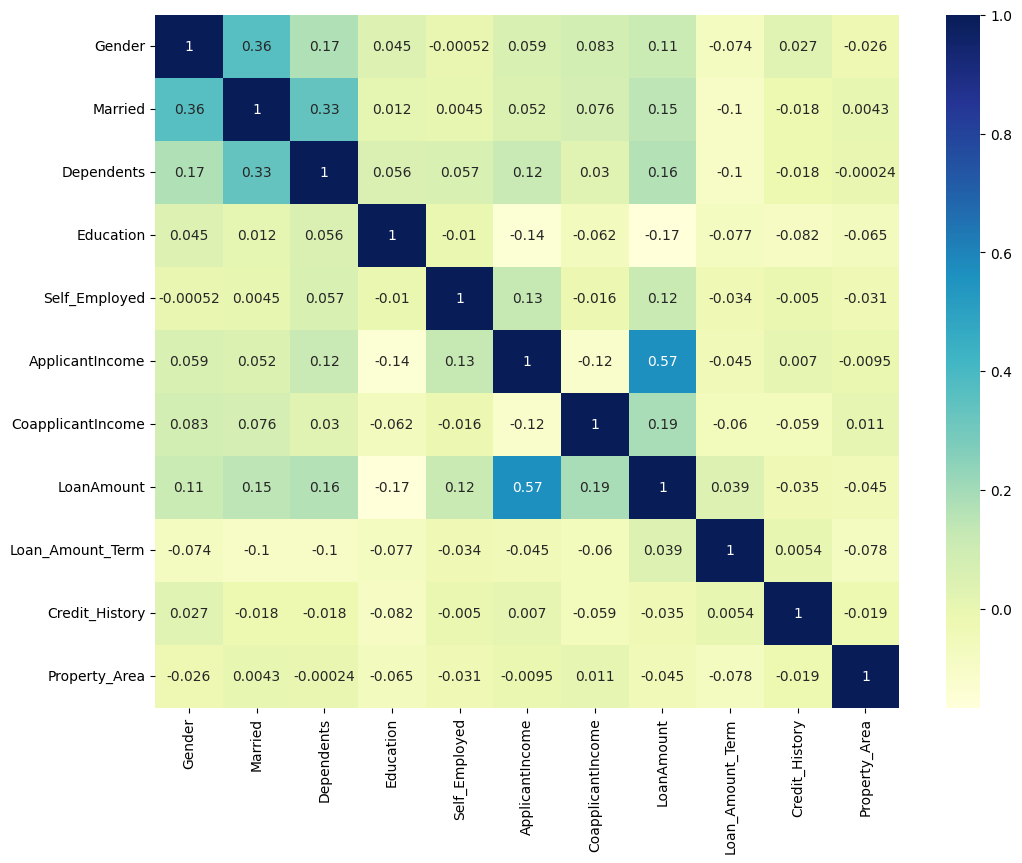

In [92]:
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(data=dataset.corr(), cmap="YlGnBu", annot=True, ax=ax)
plt.show()

In [93]:
dataset.drop(['Loan_Amount_Term'], axis=1,inplace=True)
dataset.drop(['Credit_History'], axis=1,inplace=True)
dataset.drop(['Property_Area'], axis=1,inplace=True)

In [94]:
print(dataset.keys())

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'],
      dtype='object')


In [95]:
Y=dataset.loc[:,'LoanAmount']
dataset.drop(['LoanAmount'], axis=1,inplace=True)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(dataset, Y, test_size=0.2, random_state=42)


In [97]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [98]:
print(regr.coef_)
print(regr.intercept_)

[ 3.35093439e+00  1.27530040e+01  4.68180004e+00 -2.02391231e+01
  1.42393747e+01  7.74038142e-03  6.40951928e-03]
83.61169909398768


In [99]:
Predict=regr.predict(X_test)

In [ ]:
print(f"MSE: {mean_squared_error(Predict,y_test)}")

MSE: 2574.1482449893597


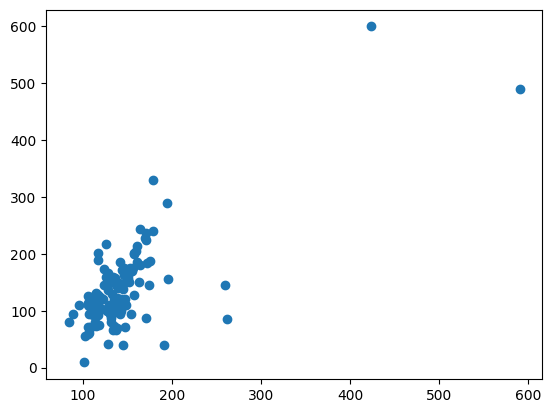

In [101]:
plt.scatter(Predict,y_test)

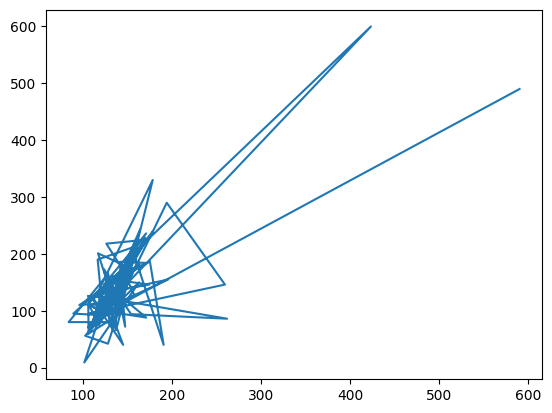

In [102]:
plt.plot(Predict,y_test)

In [103]:
loan_amount=regr.predict([[1,0,0,1,1,55000,40000]])
print(loan_amount)

[763.06463414]


c:\Users\my658\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
